In [2]:
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator


In [3]:
data_dir = 'data/kumas_hasar/'

In [15]:
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizasyon
    validation_split=0.2,       # Eğitim ve doğrulama setlerine ayrım
    rotation_range=40,          # Resimleri döndürme
    width_shift_range=0.2,      # Genişlik kaydırma
    height_shift_range=0.2,     # Yükseklik kaydırma
    shear_range=0.2,            # Kesme kaydırması
    zoom_range=0.2,             # Yakınlaştırma
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Doldurma modu
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 331 images belonging to 3 classes.
Found 81 images belonging to 3 classes.


In [17]:
from keras.src import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,InputLayer

model = Sequential([
    InputLayer(input_shape=(img_height, img_width, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
epochs = 30

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/30


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3517 - loss: 1.3275 - val_accuracy: 0.4444 - val_loss: 1.0899
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4445 - loss: 1.0797 - val_accuracy: 0.4568 - val_loss: 1.0417
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4673 - loss: 1.0231 - val_accuracy: 0.5185 - val_loss: 1.0714
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4913 - loss: 1.0082 - val_accuracy: 0.6049 - val_loss: 0.9260
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5427 - loss: 0.9075 - val_accuracy: 0.6296 - val_loss: 0.8759
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6176 - loss: 0.8396 - val_accuracy: 0.6049 - val_loss: 0.8604
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6222 - loss: 0.8415 - val_accuracy: 0.6173 - val_loss: 0.9720
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5734 - loss: 0.9049 - val_accuracy: 0.6296 - val_loss: 0.8477
Epo

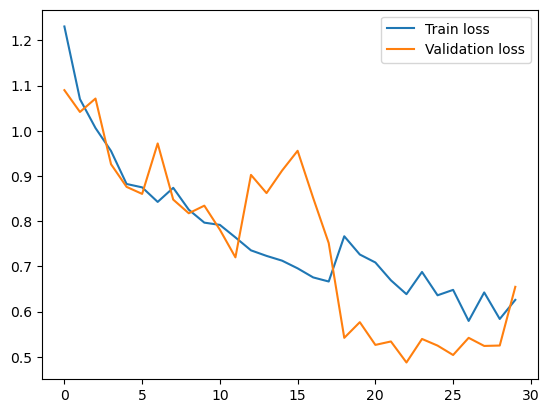

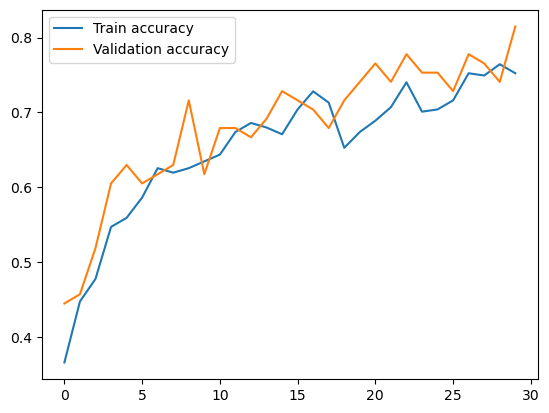

In [19]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp grafiğini çiz
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluk grafiğini çiz
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()

In [20]:
model.save('kumas_hasar_model.h5')

In [28]:
from keras.api.models import load_model

# Modeli yükle
loaded_model = load_model('kumas_hasar_model.h5')


In [53]:
import numpy as np
from keras.src.legacy.preprocessing import image

# Test için bir görüntü yükle
img_path = 'C:\\Users\\PC\\Downloads\\Compressed\\archive (1)\\Data Set\\horizontal\\18_processed (2).jpg'
img = image.image_utils.load_img(img_path, target_size=(img_height, img_width))
img_array = image.image_utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Resmi 4 boyutlu hale getirir (1, img_height, img_width, 3)
img_array /= 255.0  # Normalizasyon

# Modeli kullanarak tahmin yap
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Tahmin edilen sınıfı yazdır
class_labels = list(train_generator.class_indices.keys())
print("Tahmin edilen sınıf:", class_labels[predicted_class[0]])
print(class_labels)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tahmin edilen sınıf: horizontal
['hole', 'horizontal', 'verticle']
